<a href="https://colab.research.google.com/github/Nadda1004/Intro_Machine_learning/blob/main/W1_D1_ML_HeuristicModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Rain in Seattle
Seattle is one of the rainiest places in the world. Even so, it is worth asking the question 'will it rain tomorrow.' Imagine you are headed to sleep at a hotel in downtown Seattle. 

The next days activities are supposed to include walking around outside most of the day. You want to know if it will rain or not (you don't really care how much rain just a simple yes or no will do), which will greatly impact what you choose to wear and carry around (like an umbrella). 


Build a heuristic model to predict if it will rain tomorrow.



## Our Data

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv')

df

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      25551 non-null  object 
 1   prcp    25548 non-null  float64
 2   tmax    25551 non-null  int64  
 3   tmin    25551 non-null  int64  
 4   rain    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [ ]:
#since the ds is representing the date but its not in date time format i will convert it to datetime format
df.ds = pd.to_datetime(df['ds'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      25551 non-null  datetime64[ns]
 1   prcp    25548 non-null  float64       
 2   tmax    25551 non-null  int64         
 3   tmin    25551 non-null  int64         
 4   rain    25548 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 998.2+ KB


In [ ]:
df.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [ ]:
import numpy as np

# what % of days did it rain?
rainy = (df.rain.value_counts()[1] / df.shape[0]) * 100
print('The Percenatge of Rained Days {:.3f}%'.format(rainy))

The Percenatge of Rained Days 42.660%


In [ ]:
# what values are seen in the prcp column
df.prcp.value_counts()

0.00    14648
0.01      933
0.02      707
0.03      493
0.04      428
        ...  
2.49        1
2.18        1
2.20        1
2.70        1
2.95        1
Name: prcp, Length: 207, dtype: int64

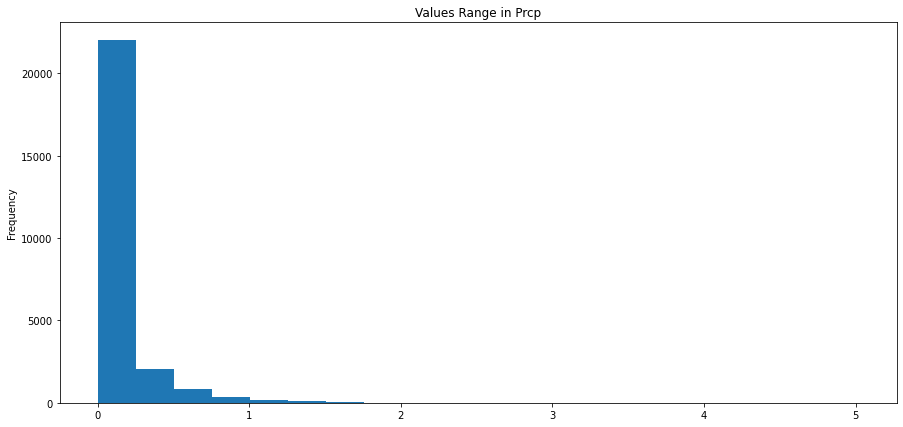

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
df.prcp.plot.hist(bins = 20).set(title = 'Values Range in Prcp');

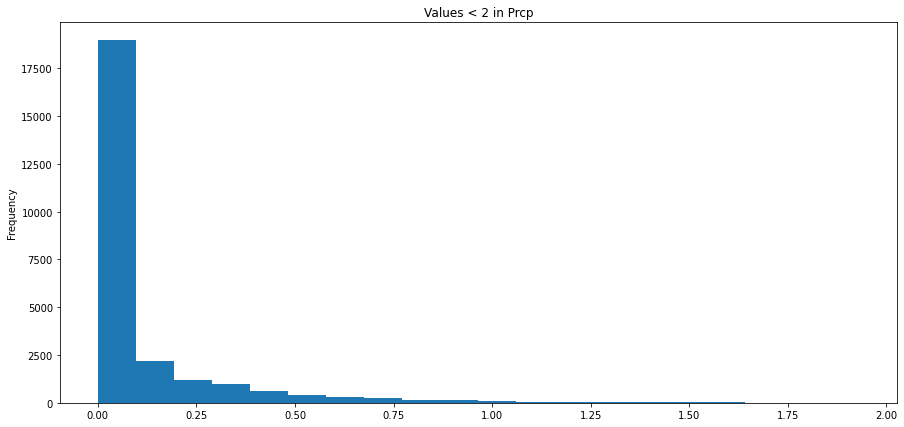

In [ ]:
# show me a histogram of prcp < 2
plt.figure(figsize=(15,7))
df.loc[df.prcp < 2].prcp.plot.hist(bins = 20).set(title = 'Values < 2 in Prcp');

#### Check for Missing Values and Outliers

In [ ]:
# how many null values does each column have?
df.isnull().sum()

ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [ ]:
# show me the null rows
df.loc[df.isnull().any(axis=1)]

,ds,prcp,tmax,tmin,rain
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [ ]:
# drop the null rows and update the dataframe
df1 = df.dropna()
df1

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


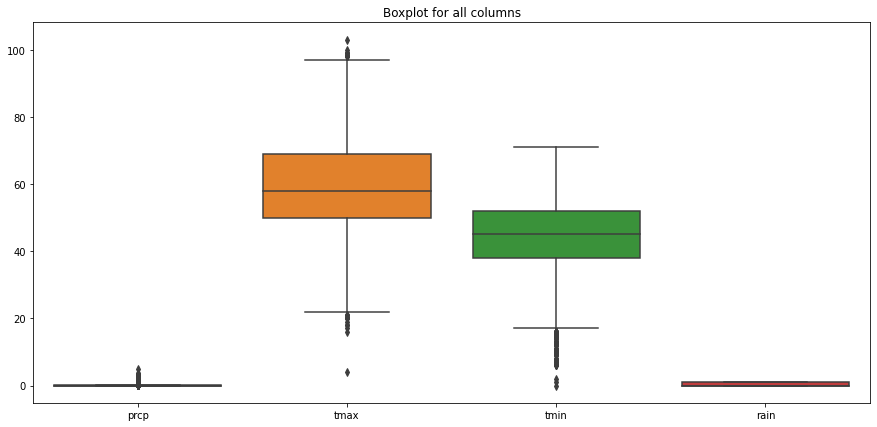

In [ ]:
import seaborn as sns

# make a box plot
plt.figure(figsize=(15,7))
sns.boxplot(data=df1).set(title = 'Boxplot for all columns');

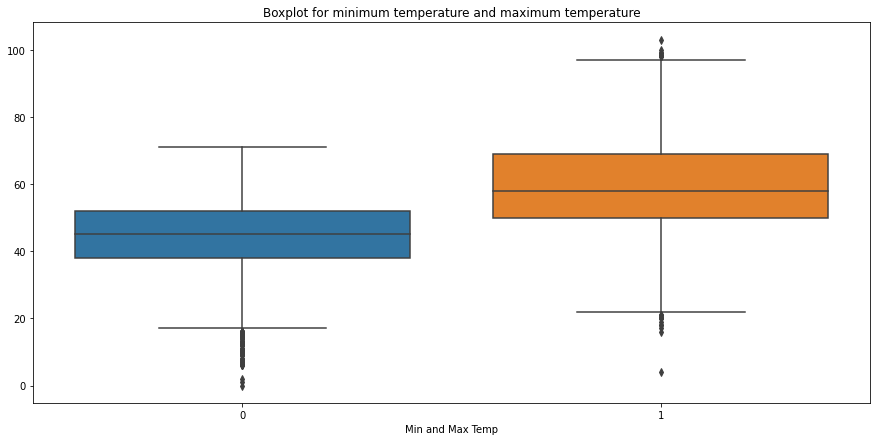

In [ ]:
# show me some outler values from tmax or tmin
plt.figure(figsize=(15,7))
sns.boxplot(data=[df1.tmin , df1.tmax]).set(title = 'Boxplot for minimum temperature and maximum temperature' );
plt.xlabel('Min and Max Temp');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


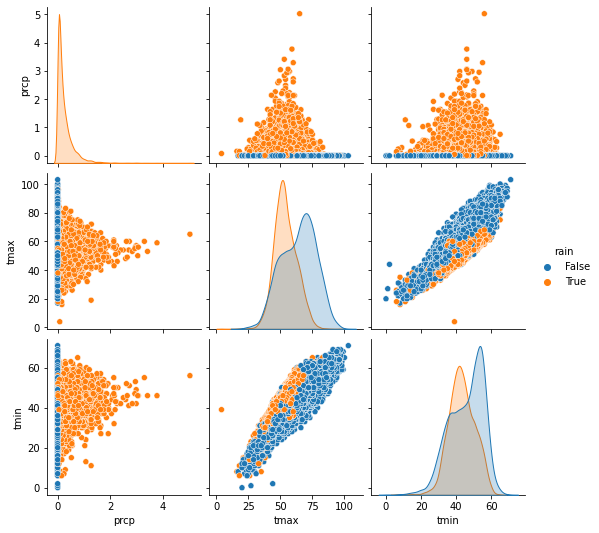

In [ ]:
# make an sns pairplot with hue='rain'
sns.pairplot(data = df1 , hue = 'rain');

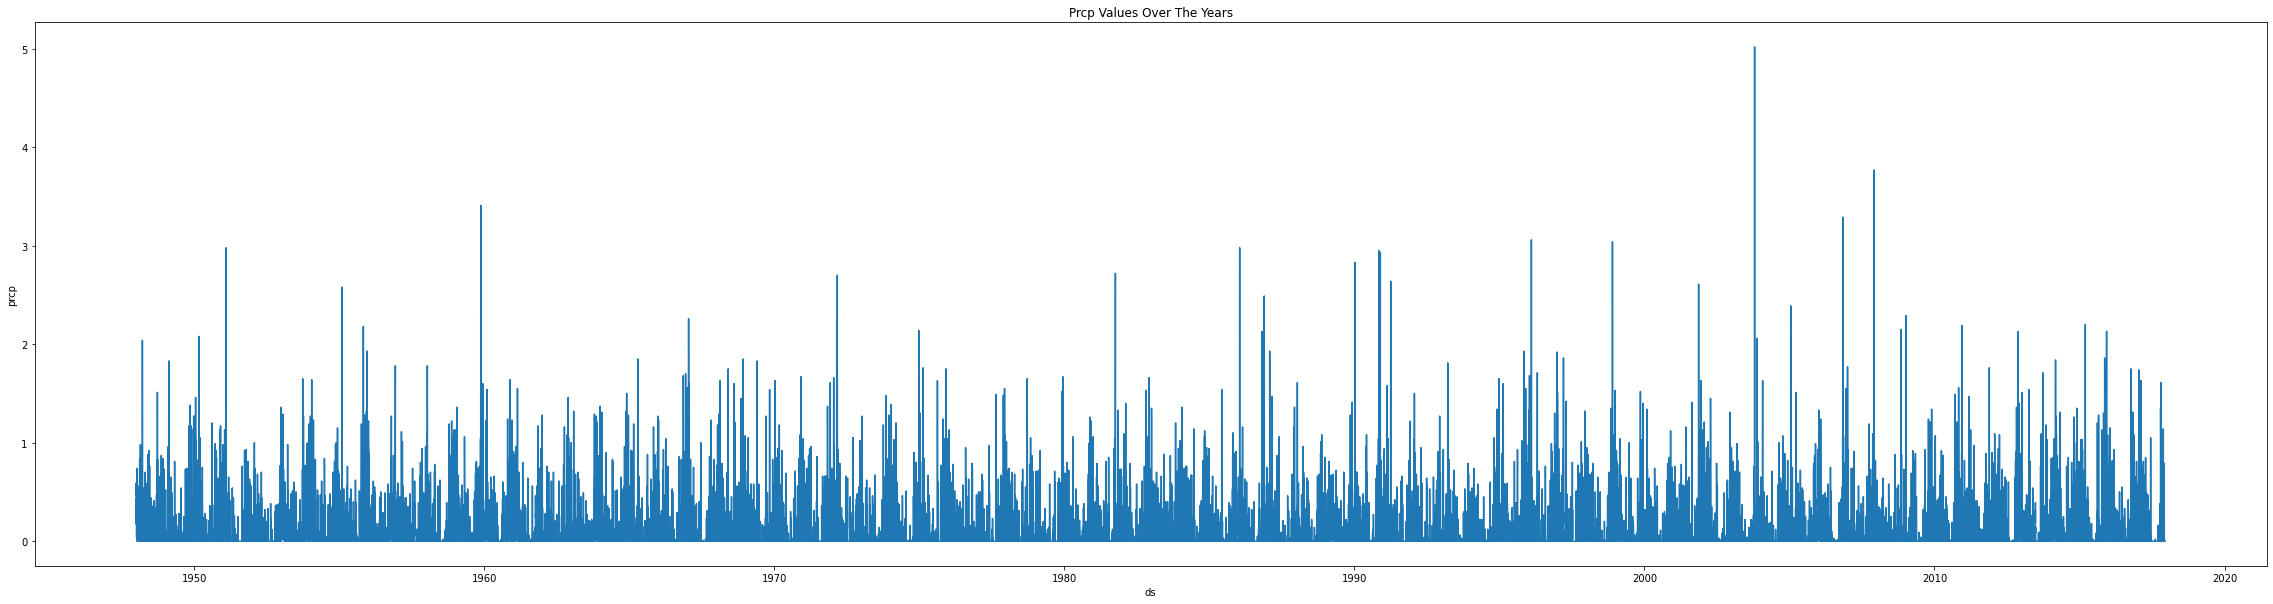

In [ ]:
# bonus challenge
# plot prcp by day (ds on x axis)
plt.figure(figsize=(40,10))
sns.lineplot(x = df1.ds , y = df1.prcp).set(title = 'Prcp Values Over The Years');

## Set up a basic model to make predicitons

First, split the data...

In [ ]:
from sklearn.model_selection import train_test_split

X = df1[['prcp', 'tmax', 'tmin']]  # all the values you want to help predict the target value
y = df1.rain.astype(np.int32)  # the target value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Bring in a model now...

In [ ]:
from sklearn.linear_model import LogisticRegression

# logistic regression is a classifier, for our case, True (1) or False (0)
lr = LogisticRegression()

lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the y values from X test data
lr.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
preds = lr.predict(X_test)

In [ ]:
# how'd your model score?
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds) * 100

92.6027397260274